In [ ]:
!pip install tensorflow

In [ ]:
import json
from google.colab import drive

drive.mount('/content/drive')
train_path = '/content/drive/MyDrive/train_data.json'
test_path = '/content/drive/MyDrive/test_data.json'

# 讀取訓練資料
with open(train_path, 'r', encoding='utf-8') as f:
    train_data = json.load(f)
# 讀取測試資料
with open(test_path, 'r', encoding='utf-8') as f:
    test_data = json.load(f)

# 提取商品描述與分類標籤
train_texts = [item['description'] for item in train_data]
train_labels = [item['catid'] for item in train_data]

test_texts = [item['description'] for item in test_data]
test_labels = [item['catid'] for item in test_data]

Mounted at /content/drive


# 使用多項式朴素貝葉斯（Multinomial Naive Bayes）

Classification Report:
              precision    recall  f1-score   support

          62       0.62      0.62      0.62        52
          63       0.69      0.80      0.74        50
          64       0.79      0.76      0.77        45
          65       0.42      0.72      0.53        43
          66       1.00      0.77      0.87        47
          67       0.85      0.66      0.74        59
          68       0.75      0.72      0.73        50
          69       0.84      0.71      0.77        52
          70       0.74      0.87      0.80        45
          73       0.57      0.67      0.62        49
          74       0.95      0.91      0.93        44
          75       0.84      0.69      0.76        54
          76       0.83      0.78      0.80        55
         100       0.74      0.71      0.73        56
        1657       0.72      0.60      0.65        60
        1837       0.69      0.80      0.74        44
        1859       0.74      0.87      0.80        52
    

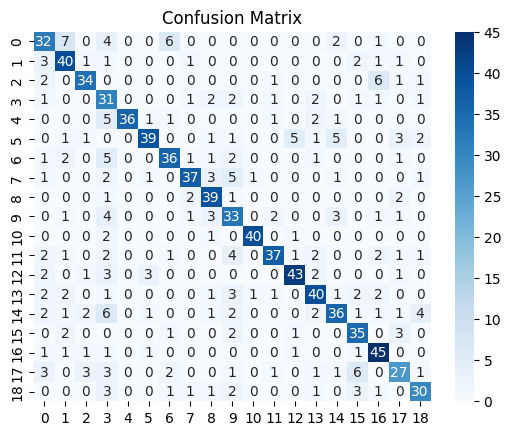


Classification Report:
              precision    recall  f1-score   support

          62       0.62      0.62      0.62        52
          63       0.69      0.80      0.74        50
          64       0.79      0.76      0.77        45
          65       0.42      0.72      0.53        43
          66       1.00      0.77      0.87        47
          67       0.85      0.66      0.74        59
          68       0.75      0.72      0.73        50
          69       0.84      0.71      0.77        52
          70       0.74      0.87      0.80        45
          73       0.57      0.67      0.62        49
          74       0.95      0.91      0.93        44
          75       0.84      0.69      0.76        54
          76       0.83      0.78      0.80        55
         100       0.74      0.71      0.73        56
        1657       0.72      0.60      0.65        60
        1837       0.69      0.80      0.74        44
        1859       0.74      0.87      0.80        52
   

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# 使用 TF-IDF 向量化商品描述
tfidf = TfidfVectorizer(max_features=120000, ngram_range=(1,1))  # 限制最大特徵數量
X_train_tfidf = tfidf.fit_transform(train_texts)
X_test_tfidf = tfidf.transform(test_texts)

# 使用 Multinomial Naive Bayes 進行訓練
nb_model = MultinomialNB(alpha=0.1)  # 平滑參數alpha
nb_model.fit(X_train_tfidf, train_labels)

# 預測測試集
y_pred = nb_model.predict(X_test_tfidf)

# 顯示分類報告
print("Classification Report:")
print(classification_report(test_labels, y_pred))

# 計算準確率
accuracy = accuracy_score(test_labels, y_pred)
print(f"\nTest Accuracy: {accuracy * 100:.2f}%")

# 混淆矩陣
conf_matrix = confusion_matrix(test_labels, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# 顯示分類報告
print("\nClassification Report:")
print(classification_report(test_labels, y_pred))

In [ ]:
print(tfidf)

TfidfVectorizer(max_features=10000)


# 使用 Gradient Boosting Decision Tree (GBDT)



In [28]:
from sklearn.ensemble import GradientBoostingClassifier

#資料準備跟上面一樣
# 使用 TF-IDF 向量化商品描述
tfidf = TfidfVectorizer(max_features=75000)  # 限制最大特徵數量為5000
X_train_tfidf = tfidf.fit_transform(train_texts)
X_test_tfidf = tfidf.transform(test_texts)

# 訓練 Gradient Boosting Decision Tree (GBDT) 模型
gbdt_model = GradientBoostingClassifier(n_estimators=300, learning_rate=0.2, max_depth=7)  #(75000/300/0.2/7)->0.61
gbdt_model.fit(X_train_tfidf, train_labels)

GradientBoostingClassifier(learning_rate=0.2, max_depth=7, n_estimators=300)

Classification Report:
              precision    recall  f1-score   support

          62       0.62      0.48      0.54        52
          63       0.76      0.76      0.76        50
          64       0.82      0.69      0.75        45
          65       0.43      0.67      0.53        43
          66       0.83      0.53      0.65        47
          67       0.61      0.53      0.56        59
          68       0.74      0.62      0.67        50
          69       0.79      0.63      0.70        52
          70       0.80      0.71      0.75        45
          73       0.46      0.51      0.49        49
          74       0.83      0.68      0.75        44
          75       0.76      0.57      0.65        54
          76       0.80      0.60      0.69        55
         100       0.56      0.54      0.55        56
        1657       0.24      0.67      0.36        60
        1837       0.73      0.73      0.73        44
        1859       0.85      0.79      0.82        52
    

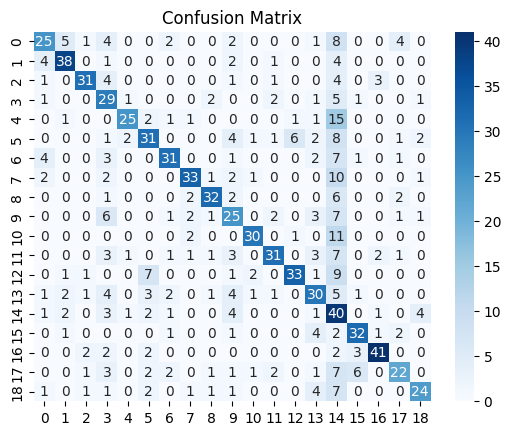


Classification Report:
              precision    recall  f1-score   support

          62       0.62      0.48      0.54        52
          63       0.76      0.76      0.76        50
          64       0.82      0.69      0.75        45
          65       0.43      0.67      0.53        43
          66       0.83      0.53      0.65        47
          67       0.61      0.53      0.56        59
          68       0.74      0.62      0.67        50
          69       0.79      0.63      0.70        52
          70       0.80      0.71      0.75        45
          73       0.46      0.51      0.49        49
          74       0.83      0.68      0.75        44
          75       0.76      0.57      0.65        54
          76       0.80      0.60      0.69        55
         100       0.56      0.54      0.55        56
        1657       0.24      0.67      0.36        60
        1837       0.73      0.73      0.73        44
        1859       0.85      0.79      0.82        52
   

In [29]:
# 預測測試集
y_pred = gbdt_model.predict(X_test_tfidf)

# 顯示分類報告
print("Classification Report:")
print(classification_report(test_labels, y_pred))

# 計算準確率
accuracy = accuracy_score(test_labels, y_pred)
print(f"\nTest Accuracy: {accuracy * 100:.2f}%")

# 混淆矩陣
conf_matrix = confusion_matrix(test_labels, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# 顯示分類報告
print("\nClassification Report:")
print(classification_report(test_labels, y_pred))